In [89]:
import sklearn
from sklearn import datasets,svm
digits=datasets.load_digits()

In [18]:
print(digits.data)
print(digits.data.size) #1797(n_sampels)*64(features)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
115008


In [19]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [20]:
print(digits.target.size)

1797


In [21]:
from sklearn.svm import SVC

In [22]:
clf=SVC(gamma=0.001,C=100)

In [23]:
clf.fit(digits.data[:-1],digits.target[:-1])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
print(clf.predict(digits.data[-1:]))

[8]


In [28]:
import pickle
s=pickle.dumps(clf) #saved our classifier in s, so that it can be loaded any time we need it again

In [32]:
clf2=pickle.loads(s) #loaded the classifier again in clf2
print(clf2.predict(digits.data[-1:]))

[8]


In [39]:
import joblib
from joblib import dump, load
dump(clf,'classifier.joblib')

['classifier.joblib']

In [40]:
clf3=load('classifier.joblib')

In [41]:
print(clf3.predict(digits.data[-1:]))

[8]


In [43]:
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [45]:
clf.fit(iris.data, iris.target_names[iris.target]) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

In [49]:
from sklearn.preprocessing import LabelBinarizer as LBZ
from sklearn.preprocessing import MultiLabelBinarizer as MLBZ

In [51]:
y = [0, 0, 1, 1, 2]
y=LBZ().fit_transform(y)
print(y)

[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]


In [55]:
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y=MLBZ().fit_transform(y)
print(y)

[[1 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 1 0]
 [0 0 1 0 1]]


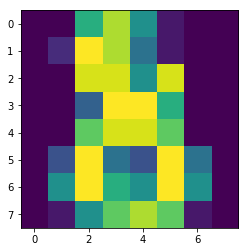

In [58]:
import matplotlib.pyplot as plt 
plt.imshow(digits.images[-1]) 
plt.show()

In [61]:
from sklearn.model_selection import train_test_split 
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris.data,iris.target, test_size=0.20, random_state=42)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
iris_y_pred=knn.predict(iris_X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [68]:
iris_y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(iris_y_pred,iris_y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [84]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
print(Cs)
svc = svm.SVC(kernel='linear')
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1)
clf.fit(iris_X_train, iris_y_train)

[1.00000000e-06 3.59381366e-06 1.29154967e-05 4.64158883e-05
 1.66810054e-04 5.99484250e-04 2.15443469e-03 7.74263683e-03
 2.78255940e-02 1.00000000e-01]


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-06, 3.59381e-06, 1.29155e-05, 4.64159e-05, 1.66810e-04,
       5.99484e-04, 2.15443e-03, 7.74264e-03, 2.78256e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [86]:
clf.best_score_ 

0.9583333333333334

In [87]:
clf.best_estimator_.C 

0.1

In [88]:
clf.score(iris_X_test,iris_y_test) 

1.0